In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from datetime import datetime
%matplotlib inline

In [4]:
warnings.filterwarnings('ignore')
path = 'D:/Programming/Python/DataScience/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
all_months_data = pd.DataFrame()

In [2]:
warnings.filterwarnings('ignore')
path = 'D:/Programming/Python/DataScience/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'

files = [file for file in os.listdir(path)]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+'/'+file)
    all_months_data = pd.concat([all_months_data,df])

print(all_months_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

         Order Date                      Purchase Address  
0    04/19/19 08:46          917 1st St, Dallas, TX 75001  
1  04-07-2019 22:30     682 Chestnut St, Boston, MA 02215  
2  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
3  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
4    04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


#### Saving all data to a single CSV file

In [2]:
all_months_data.to_csv(path+"/"+"all_data.csv",index=False)

NameError: name 'all_months_data' is not defined

In [87]:
all_data = pd.read_csv(path+"/"+"all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Cleaning data

#### 1) Removing NaNs

In [88]:
missing_val_count_by_column = (all_data.isnull().sum())
print(missing_val_count_by_column[ missing_val_count_by_column > 0 ])
print('Count:',len(missing_val_count_by_column[missing_val_count_by_column > 0]))

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64
Count: 6


In [89]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# checking if missing values are deleted
missing_val_count_by_column = (all_data.isnull().sum())
print('Count:',len(missing_val_count_by_column[missing_val_count_by_column > 0]))

Count: 0


#### 2) Converting to std Datetime format

In [55]:
#converting to datetime64[ns]
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],errors='coerce').dt.strftime('%m-%d-%Y %H:%M')
#recheck datatype of index
print(all_data['Order Date'].dtype)
all_data.head()

object


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04-19-2019 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04-30-2019 09:27,"333 8th St, Los Angeles, CA 90001"


In [93]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Na"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [94]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Q1 Which month had best sales?

In [95]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [96]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors='coerce')
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [98]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


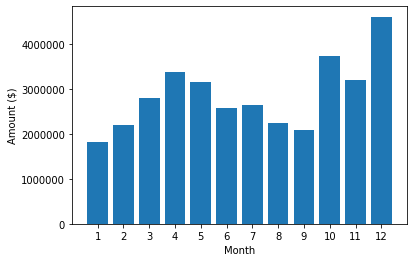

In [99]:
months = range(1,13)
results = all_data.groupby('Month').sum()
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.show()

##### April and December had very good sales .May be due to promotions,holidays,gifting season

### Q2. What city sold the most product? 

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return  address.split(',')[2].split(' ')[1]

# F string example
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04-19-2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04-30-2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [17]:
result2 = all_data.groupby('City').sum()
result2['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

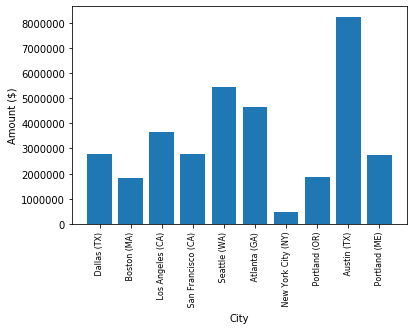

In [18]:
city_names = all_data['City'].unique()
result2 = all_data.groupby('City').sum()
plt.bar(city_names,result2['Sales'])
plt.xticks(city_names, rotation = 'vertical',size=8)
plt.xlabel("City")
plt.ylabel("Amount ($)")
plt.show()

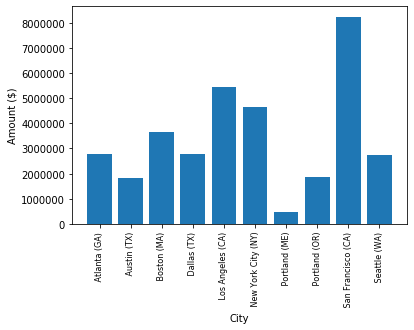

In [65]:
# THe order of cities is different in the plot and thus results are WRONG, so to correct this use code below:

city_names = [city for city, df in all_data.groupby('City')]
result2 = all_data.groupby('City').sum()

plt.bar(city_names,result2['Sales'])
plt.xticks(city_names, rotation = 'vertical',size=8)
plt.xlabel("City")
plt.ylabel("Amount ($)")
plt.show()

### Q3. What time should we display advertisements to maximize the likelihood of purchases?

In [32]:
# df.filter will create a new copy of the df without modifying it with future operations
temp_df = all_data.filter(['Order ID','Order Date','Purchase Address'],axis=1)
temp_df['Order Date'] = pd.to_datetime(temp_df['Order Date'])
temp_df.head()

,Order ID,Order Date,Purchase Address
0,176558,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [36]:
temp_df['Hour'] = temp_df['Order Date'].dt.hour
temp_df['Minute'] = temp_df['Order Date'].dt.minute
temp_df.head()

,Order ID,Order Date,Purchase Address,Hour,Minute
0,176558,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,46
1,176559,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,30
2,176560,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38
3,176560,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38
4,176561,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,27


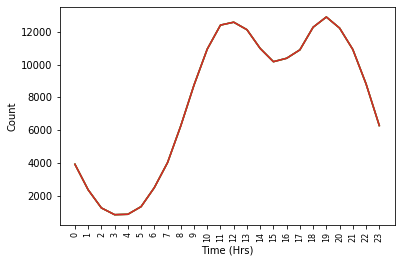

In [39]:

hours = [hour for hour, df in temp_df.groupby('Hour')]
result3 = temp_df.groupby('Hour').count()
plt.plot(hours,result3)
plt.xticks(hours, rotation = 'vertical',size=8)
plt.xlabel("Time (Hrs)")
plt.ylabel("Count")
plt.show()

##### Best time to display ads would be just around 11am-12pm and 7pm-8pm

### Q4. What products are most often sold together? 

In [58]:
temp_df2 = all_data[all_data['Order ID'].duplicated(keep=False)]
temp_df2['Grouped'] = temp_df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
temp_df2 = temp_df2[['Order ID','Grouped']].drop_duplicates()
temp_df2.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [60]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in temp_df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common():
    print(key,value)

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batter

##### Phone and its charging cable are sold most often

### Q5. What product sold the most? Why do you think it did?

In [100]:
product_group = all_data.groupby('Product')
qty_ordered = product_group['Quantity Ordered'].count()
qty_ordered

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'Product', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


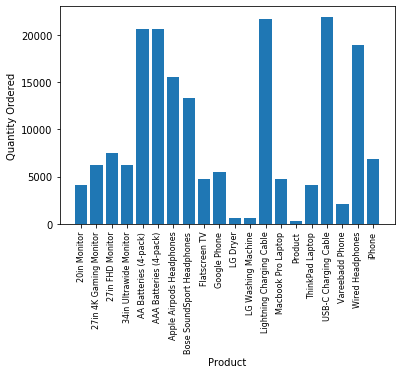

In [84]:
products = [product for product, df in product_group]
print(products)

plt.bar(products,qty_ordered)
plt.xticks(products, rotation = 'vertical',size=8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()


#####  Charging cables sold the most

##### To answer the "why" part, we will plot price graph on the same chart

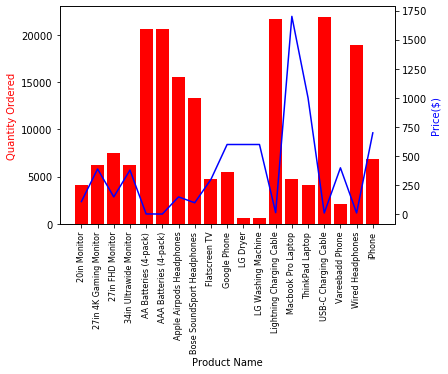

In [105]:
products = [product for product, df in product_group]
prices = product_group['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products,qty_ordered,color='r')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products,rotation = 'vertical',size=8)
ax1.set_ylabel('Quantity Ordered',color='r')
ax2.set_ylabel('Price($)',color='b')
plt.show()

##### Price and qty sold show inverse relationship. So charging cables are sold more as they have a low price tag.